In [14]:
#Load necessary library  
import pandas as pd
import numpy as np
rng = np.random.default_rng(7) 
import matplotlib.pyplot as plt
import seaborn as sns


# Question 1 Loading the data

In [15]:
#Load data
df = pd.read_csv("horse.csv")

# Question 2 Data pre-processing 

In [16]:
missing_vc = df.isna().any(axis=1).sum()
print(missing_vc)

293


In [17]:
#check make sure column 
for idx, col in enumerate(df.columns):
    print(f"Column {col} is at index {idx}")

Column surgery is at index 0
Column age is at index 1
Column hospital_number is at index 2
Column rectal_temp is at index 3
Column pulse is at index 4
Column respiratory_rate is at index 5
Column temp_of_extremities is at index 6
Column peripheral_pulse is at index 7
Column mucous_membrane is at index 8
Column capillary_refill_time is at index 9
Column pain is at index 10
Column peristalsis is at index 11
Column abdominal_distention is at index 12
Column nasogastric_tube is at index 13
Column nasogastric_reflux is at index 14
Column nasogastric_reflux_ph is at index 15
Column rectal_exam_feces is at index 16
Column abdomen is at index 17
Column packed_cell_volume is at index 18
Column total_protein is at index 19
Column abdomo_appearance is at index 20
Column abdomo_protein is at index 21
Column outcome is at index 22
Column surgical_lesion is at index 23
Column lesion_1 is at index 24
Column lesion_2 is at index 25
Column lesion_3 is at index 26
Column cp_data is at index 27


In [18]:
#set the columns that I am interesting 
columns_1922 = df.iloc[:,3:22]

# Check for missing values in the specified columns and count rows with at least one missing value
missing_medical = columns_1922.isna().all(axis=1).sum()

missing_medical

4

In [19]:
#find the each row missing proportions 
missing_p = df.isnull().mean(axis=1)

# Display the result
print(missing_p)

0      0.214286
1      0.178571
2      0.178571
3      0.035714
4      0.428571
         ...   
294    0.321429
295    0.071429
296    0.107143
297    0.035714
298    0.357143
Length: 299, dtype: float64


In [20]:
#find the each column missing proportions 
missing_p = df.isnull().mean(axis=0)

# Display the result
print(missing_p)

surgery                  0.000000
age                      0.000000
hospital_number          0.000000
rectal_temp              0.200669
pulse                    0.080268
respiratory_rate         0.193980
temp_of_extremities      0.187291
peripheral_pulse         0.230769
mucous_membrane          0.157191
capillary_refill_time    0.107023
pain                     0.183946
peristalsis              0.147157
abdominal_distention     0.187291
nasogastric_tube         0.347826
nasogastric_reflux       0.354515
nasogastric_reflux_ph    0.822742
rectal_exam_feces        0.341137
abdomen                  0.394649
packed_cell_volume       0.096990
total_protein            0.110368
abdomo_appearance        0.551839
abdomo_protein           0.662207
outcome                  0.000000
surgical_lesion          0.000000
lesion_1                 0.000000
lesion_2                 0.000000
lesion_3                 0.000000
cp_data                  0.000000
dtype: float64


In [21]:
# Select numeric columns
numeric_c = df.select_dtypes(include='number').columns

# Replace the missing value in numeric columns with each column's median
df[numeric_c] = df[numeric_c].fillna(df[numeric_c].median())

# Select object columns
object_c = df.select_dtypes(include='object').columns

# Replace the missing value in object columns with each column's median
df[object_c] = df[object_c].fillna('missing')

# Display the updated DataFrame
print(df)

#Save it to the new file 
df.to_csv('horsemed.csv', index=False)

    surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0        no  adult           530101         38.5   66.0              28.0   
1       yes  adult           534817         39.2   88.0              20.0   
2        no  adult           530334         38.3   40.0              24.0   
3       yes  young          5290409         39.1  164.0              84.0   
4        no  adult           530255         37.3  104.0              35.0   
..      ...    ...              ...          ...    ...               ...   
294     yes  adult           533886         38.2  120.0              70.0   
295      no  adult           527702         37.2   72.0              24.0   
296     yes  adult           529386         37.5   72.0              30.0   
297     yes  adult           530612         36.5  100.0              24.0   
298     yes  adult           534618         37.2   40.0              20.0   

    temp_of_extremities peripheral_pulse mucous_membrane  \
0              

# Question 3 Visualization 

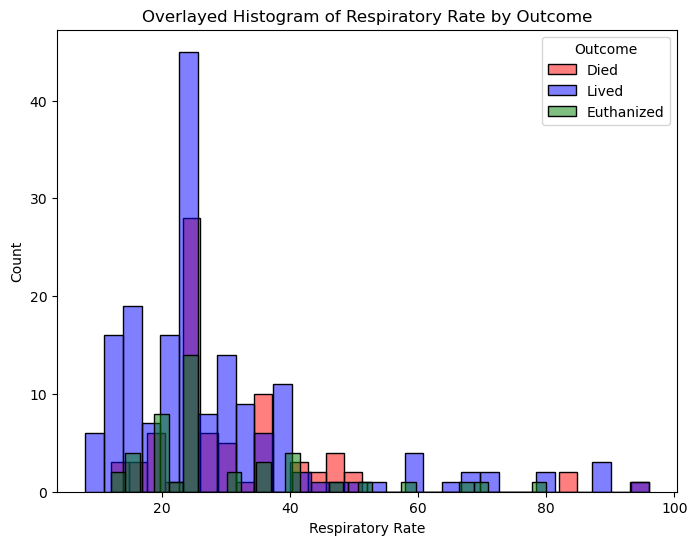

In [22]:
plt.figure(figsize=(8, 6))

# Create the first histogram and capture the axis
ax = sns.histplot(df[df["outcome"] == "died"], x="respiratory_rate", color="red", label="Died", alpha=0.5, bins=30)

# Overlay additional histograms using the same axis
sns.histplot(df[df["outcome"] == "lived"], x="respiratory_rate", color="blue", label="Lived", alpha=0.5, bins=30, ax=ax)
sns.histplot(df[df["outcome"] == "euthanized"], x="respiratory_rate", color="green", label="Euthanized", alpha=0.5, bins=30, ax=ax)

# Add labels and title
plt.xlabel("Respiratory Rate")
plt.ylabel("Count")
plt.title("Overlayed Histogram of Respiratory Rate by Outcome")
plt.legend(title="Outcome")

# Show the plot
plt.show()

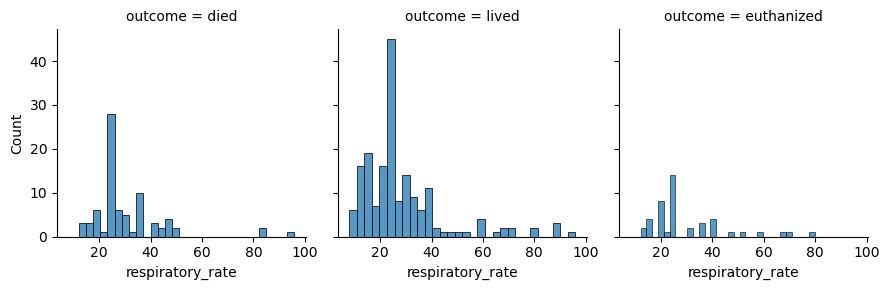

In [23]:
respiratory_outcome = sns.FacetGrid(df, col="outcome", col_order=["died", "lived", "euthanized"], sharex=True, sharey=True)

# Plot histograms
respiratory_outcome.map(sns.histplot, "respiratory_rate", bins=30)

# Show the plot
plt.show()

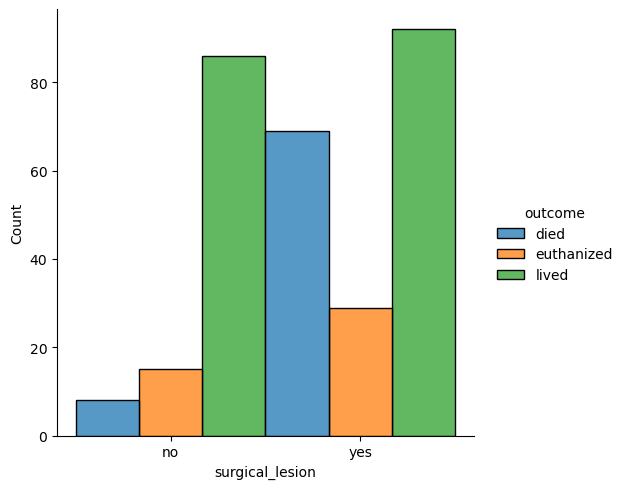

In [24]:
sns.displot(df, x="surgical_lesion", hue="outcome", multiple="dodge", bins=30)

# Show the plot
plt.show()

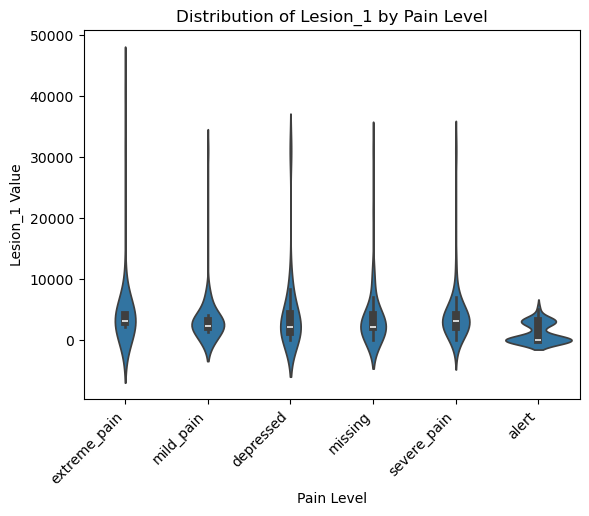

In [25]:
sns.violinplot(x="pain", y="lesion_1", data=df)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')  # Rotate 45 degrees, align right

# Add title and labels
plt.title("Distribution of Lesion_1 by Pain Level")
plt.xlabel("Pain Level")
plt.ylabel("Lesion_1 Value")

plt.show()

* The graph suggests a strong association between the presence of a surgical lesion and a negative outcome (death or euthanasia).

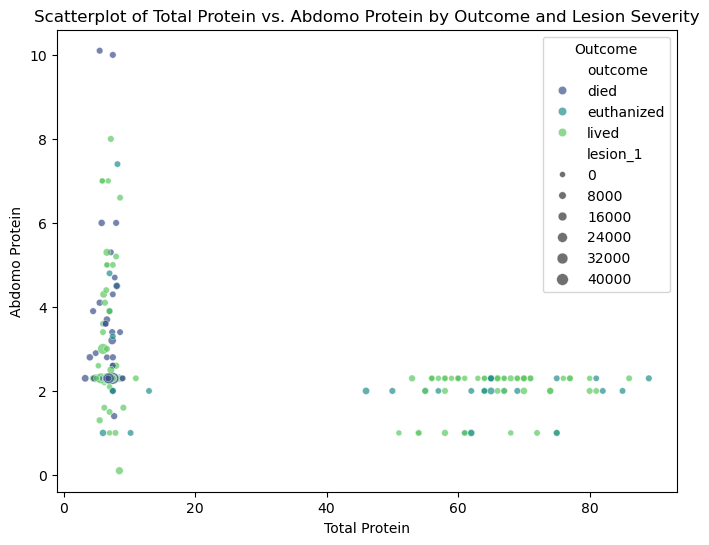

In [26]:
plt.figure(figsize=(8,6))  # Adjust figure size
sns.scatterplot(data=df, x="total_protein", y="abdomo_protein", hue="outcome", size="lesion_1", alpha=0.7, palette="viridis")

# Improve plot aesthetics
plt.xlabel("Total Protein")
plt.ylabel("Abdomo Protein")
plt.title("Scatterplot of Total Protein vs. Abdomo Protein by Outcome and Lesion Severity")
plt.legend(title="Outcome")  # Adjust legend title
plt.show()

* The plot suggests a possible relationship between protein levels and outcome, with horses that lived tending to have lower levels of both Total Protein and Abdomo Protein. However, the relationships are weak and there's considerable overlap between the outcome groups.